# Lab 2

# Machine learning and Nearest Neighbours

### 1. Splitting the dataset

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
  iris['target'], random_state=0)

In [2]:
X_train.shape

(112, 4)

In [3]:
X_test.shape

(38, 4)

In [4]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [5]:
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


### 2. Building your first model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### 3. Making predictions

In [8]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [9]:
prediction = knn.predict(X_new)
print(prediction)

[0]


In [10]:
print(iris['target_names'][prediction])

['setosa']


### 4. Evaluating the model

In [11]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.9736842105263158

In [12]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [13]:
knn.score(X_test, y_test)

0.9736842105263158

### Full procedure

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9736842105263158

### 5. Loading data from file

In this section I will create a file to use in the lab and then make some sanity checks.

In [15]:
np.savetxt('iris_data.txt',iris['data'],fmt='%3.1f')

In [16]:
X = np.genfromtxt("iris_data.txt")
# delimiter=", "
X[:3,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [17]:
iris['data'][:3,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [18]:
X[:3,] == iris['data'][:3,]

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [19]:
np.savetxt('iris_target.txt',iris['target'],fmt='%1d')

In [20]:
y = np.genfromtxt("iris_target.txt",dtype='int')
y[:3]

array([0, 0, 0])

In [21]:
y[:3] == iris['target'][:3]

array([ True,  True,  True])

### 6. Exercises

#### Exercise 1

In [22]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

A natural guess is that, in arithmetic expressions, True is interpreted as 1 and False as 0.  Let's check this.

In [23]:
(y_pred == y_test)[0]+3

4

In [24]:
(1==1)+1

2

In [25]:
(1==2)+1

1

#### Exercise 2

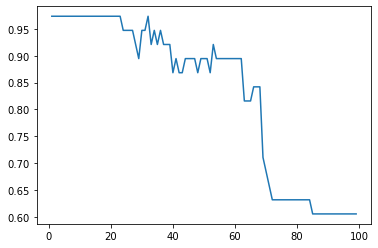

In [26]:
results = np.empty(99)   # marginally faster
# results = np.zeros(99)   # safer
for K in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    results[K-1] = knn.score(X_test, y_test)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(99)+1,results)

It is interesting that K needs to be really large for K Nearest Neighbours to degrade.

To turn the accuracy into the error rate.  This is the correct plot:

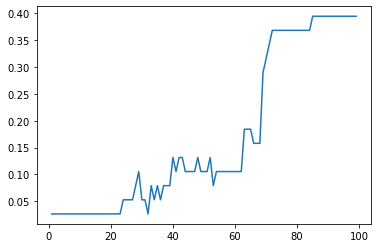

In [27]:
plt.plot(np.arange(99)+1,1-results)

Let's check that the zeros command also works:

In [28]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Exercise 3

This is one way to do it:

In [29]:
np.mean(X == iris['data'])

1.0